# **Mission**

## **Description du Projet**

Le Client est le Comité de sauvegarde de Central Park ( ou *Central Park Conservancy*) C'est une organisation privée à but non lucratif fondée en 1980, et dont le CA de 2022 s'élève à $148

Mr Blanché Antoine, du département ‘Planning and Research’ est mon contact privilégié sur cette mission. Ses coordonnées sont :<br>
ablanche@centralparknyc.org

## **Objectifs**

> Création d’un tableau de bord interactif (rédigé en anglais).

L’utilisateur final est l’ensemble des guides de Central Park. Durant leurs visites guidées, ils souhaiteraient transmettre davantage d’informations sur les écureuils vivant dans le parc. Cet animal étant notamment apprécié des enfants, c’est une vraie opportunité d’améliorer le contenu des visites, plus particulièrement pour
des groupes scolaires.

> Un tableau de bord clair et concis.

Le tableau de bord devra présenter de manière claire des informations relatives aux écureuils, d’après le dernier recensement effectué (voir le fichier .csv fourni).

*Exemples d’indicateurs : population, principaux lieux de présence dans le parc, comportements en présence d’humains, modes de vie, bruits émis, etc.*

## **Spécificités**

Un grand degré de liberté est laissé au cabinet sur la sélection des informations pertinentes, le nombre de pages du tableau de bord final, la mise en forme...
Quels que soient les choix effectués, les deux priorités restent :
*    Un document clair et compréhensible par nos équipes
*    La présence d’indicateurs pertinents, qui apporteront une vraie valeur ajoutée durant les visites.

## **Livrable**

Le document attendu est un tableau de bord conçu sur Tableau ou MS PowerBI, à partir du fichier .csv fourni.<br>
Le document est à usage strictement interne et donc non publié.<br>
Le document doit être intégralement rédigé en anglais américain, langue parlée par les guides.<br>

# **Analyse du Fichier**

## **Import des librairies et fichiers**

In [1]:
# Import des librairies

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import folium
from scipy.stats import ttest_ind
from sklearn.model_selection import learning_curve
import missingno as msno
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Lecture du fichier

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 31)
link_dataset = "https://raw.githubusercontent.com/PikaChou82/PikaChou82/refs/heads/main/ExcelFiles/2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250115.csv"
data = pd.read_csv(link_dataset)
data.head()

X          Y Unique Squirrel ID Hectare Shift      Date  \
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM  10142018   
1 -73.968857  40.783783     21B-AM-1019-04     21B    AM  10192018   
2 -73.974281  40.775534     11B-PM-1014-08     11B    PM  10142018   
3 -73.959641  40.790313     32E-PM-1017-14     32E    PM  10172018   
4 -73.970268  40.776213     13E-AM-1017-05     13E    AM  10172018   

   Hectare Squirrel Number    Age Primary Fur Color Highlight Fur Color  \
0                        3    NaN               NaN                 NaN   
1                        4    NaN               NaN                 NaN   
2                        8    NaN              Gray                 NaN   
3                       14  Adult              Gray                 NaN   
4                        5  Adult              Gray            Cinnamon   

  Combination of Primary and Highlight Color  \
0                                          +   
1                                          +   
2                                      Gray+   
3                                      Gray+   
4                              Gray+Cinnamon   

                                                                             Color notes  \
0                                                                                    NaN   
1                                                                                    NaN   
2                                                                                    NaN   
3  Nothing selected as Primary. Gray selected as Highlights. Made executive adjustments.   
4                                                                                    NaN   

       Location Above Ground Sighter Measurement Specific Location  Running  \
0           NaN                              NaN               NaN    False   
1           NaN                              NaN               NaN    False   
2  Above Ground                               10               NaN    False   
3           NaN                              NaN               NaN    False   
4  Above Ground                              NaN     on tree stump    False   

   Chasing  Climbing  Eating  Foraging Other Activities   Kuks  Quaas  Moans  \
0    False     False   False     False              NaN  False  False  False   
1    False     False   False     False              NaN  False  False  False   
2     True     False   False     False              NaN  False  False  False   
3    False     False    True      True              NaN  False  False  False   
4    False     False   False      True              NaN  False  False  False   

   Tail flags  Tail twitches  Approaches  Indifferent  Runs from  \
0       False          False       False        False      False   
1       False          False       False        False      False   
2       False          False       False        False      False   
3       False          False       False        False       True   
4       False          False       False        False      False   

  Other Interactions                                    Lat/Long  
0                NaN  POINT (-73.9561344937861 40.7940823884086)  
1                NaN  POINT (-73.9688574691102 40.7837825208444)  
2                NaN  POINT (-73.97428114848522 40.775533619083)  
3                NaN  POINT (-73.9596413903948 40.7903128889029)  
4                NaN  POINT (-73.9702676472613 40.7762126854894)

## **EDA**

### **Analyse de forme**

In [3]:
# Analyse de la forme

data.shape

(3023, 31)

In [4]:
# Types de variables

data.dtypes.value_counts() ##[ou pour le fun : data.dtypes.value_counts().plot.pie()]

object     14
bool       13
float64     2
int64       2
Name: count, dtype: int64

In [5]:
# Statistiques des colonnes

data.describe()

X            Y          Date  Hectare Squirrel Number
count  3023.000000  3023.000000  3.023000e+03              3023.000000
mean    -73.967184    40.780853  1.011949e+07                 4.123718
std       0.007726     0.010285  4.246671e+04                 3.096492
min     -73.981159    40.764911  1.006202e+07                 1.000000
25%     -73.973102    40.771676  1.008202e+07                 2.000000
50%     -73.968594    40.778166  1.012202e+07                 3.000000
75%     -73.960189    40.791219  1.014202e+07                 6.000000
max     -73.949722    40.800119  1.020202e+07                23.000000

**Commentaire :**<br>  Finalement beaucoup de données dites catégorielles, les valeurs discrètes étant essentiellement la valeur géographique, la date de l'observation et le nombre d'écureuils à l'hectare.

<Axes: >

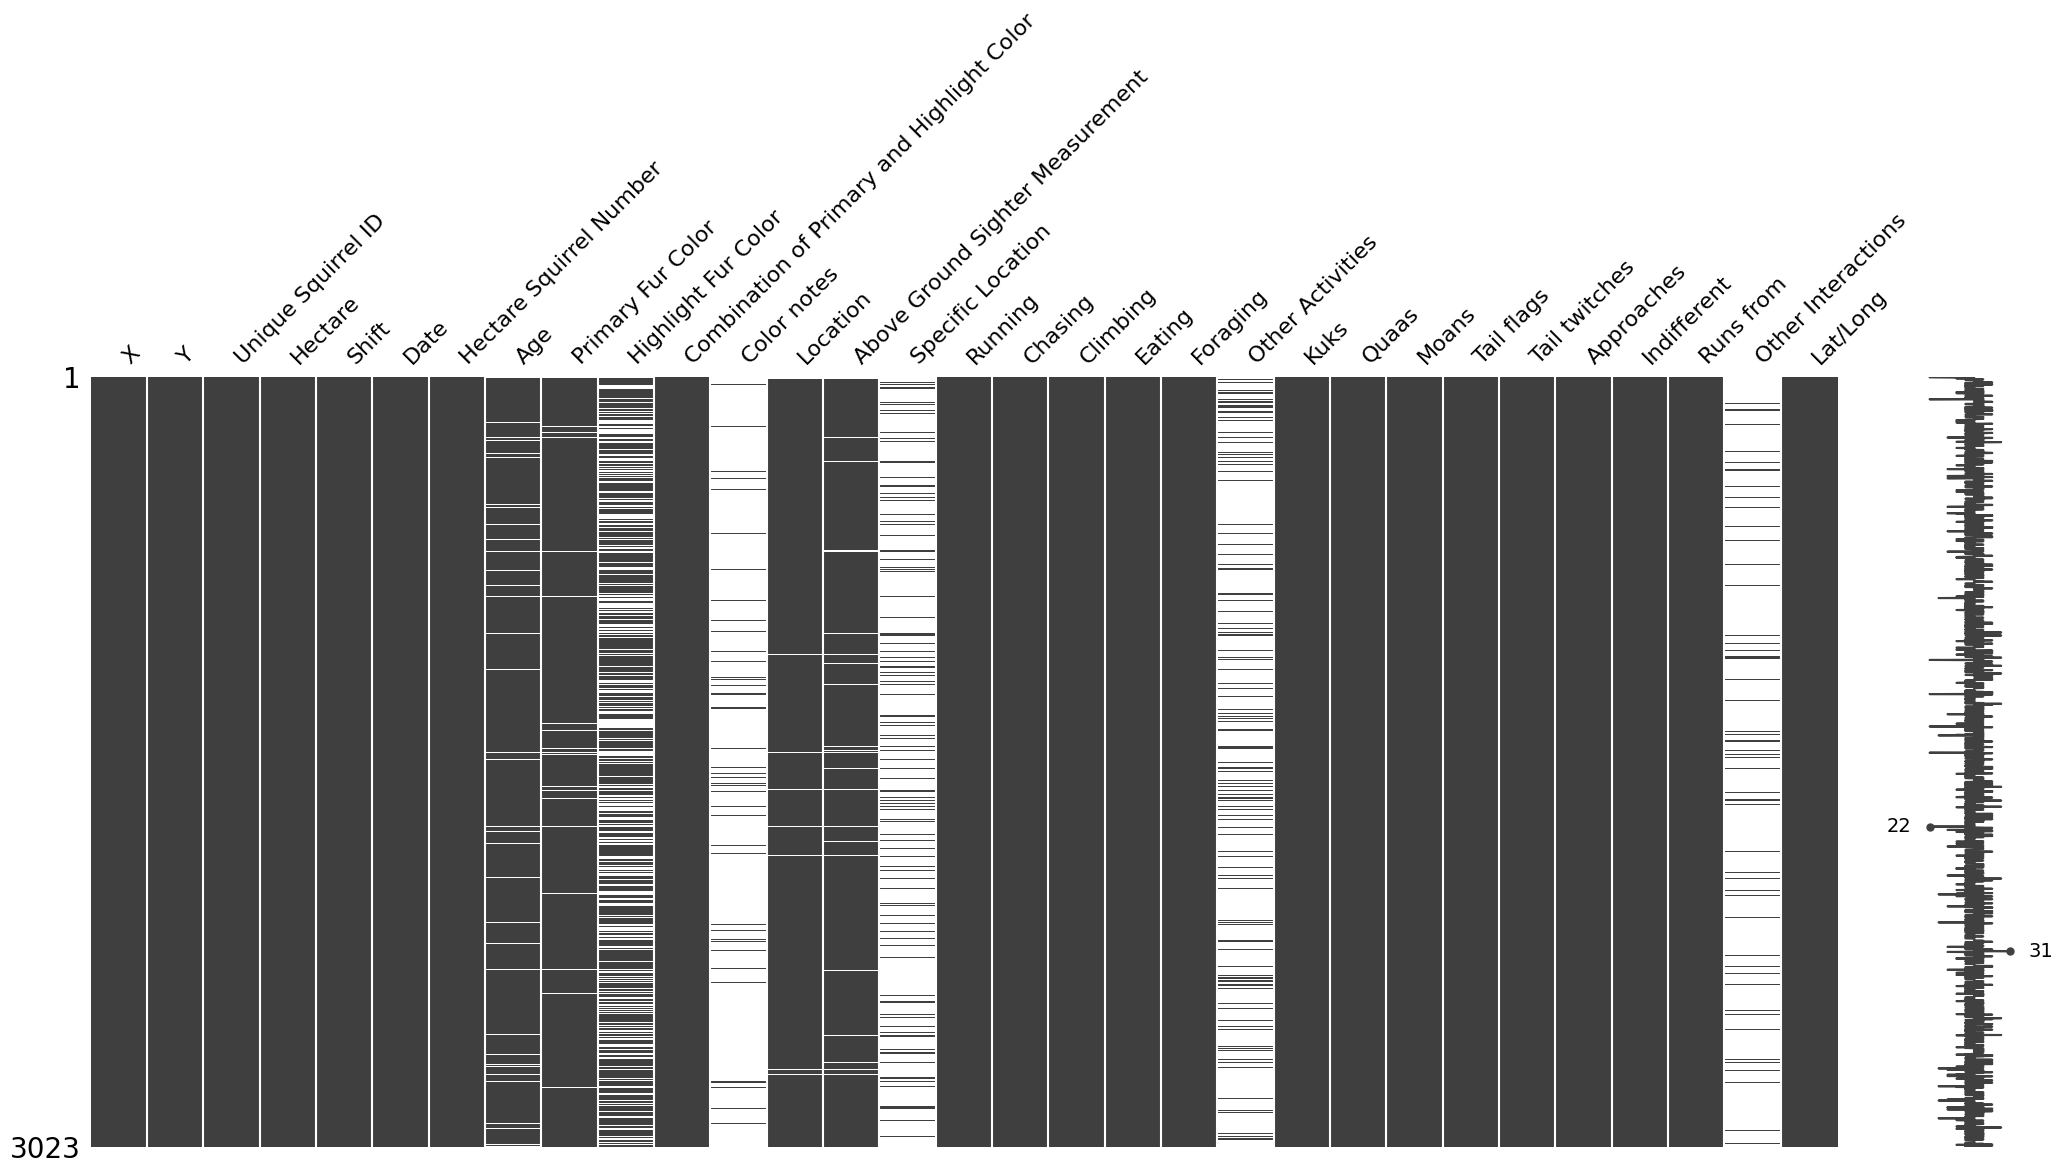

In [6]:
# Valeurs manquantes

msno.matrix(data) ## [ou pour le fun : plt.figure(figsize=(20,10)) puis sns.heatmap(data.isna(), cbar = False)]

**Commentaire :**<br>
Beaucoup de données manquantes sur les notes des observateurs quant à la couleur, l'emplacement spécifique, et les autres activités et autres locations. Ces données ne seront pas utilisées pour l'analyse car le ratio de valeurs nulles est trop important :

In [7]:
for _ in data.columns :
    if data[_].isna().sum() != 0:
        print(f"Missing Ratio on Data {_:<40} : {round(data[_].isna().sum() / data.shape[0]*100,2)}%.")

Missing Ratio on Data Age                                      : 4.0%.
Missing Ratio on Data Primary Fur Color                        : 1.82%.
Missing Ratio on Data Highlight Fur Color                      : 35.92%.
Missing Ratio on Data Color notes                              : 93.98%.
Missing Ratio on Data Location                                 : 2.12%.
Missing Ratio on Data Above Ground Sighter Measurement         : 3.77%.
Missing Ratio on Data Specific Location                        : 84.25%.
Missing Ratio on Data Other Activities                         : 85.54%.
Missing Ratio on Data Other Interactions                       : 92.06%.


En revanche, sur la Primary Fur Color, on devra faire sans ces lignes.

In [8]:
print(data.Hectare.unique())

['37F' '21B' '11B' '32E' '13E' '11H' '36H' '33F' '21C' '11D' '20B' '22F'
 '36I' '05C' '07H' '16C' '14E' '32A' '17F' '16I' '12I' '32F' '25A' '15E'
 '39G' '29I' '07E' '17C' '10A' '28A' '12B' '18A' '33H' '29C' '38C' '31H'
 '08H' '34F' '13H' '35C' '17E' '02B' '19D' '40B' '03E' '39C' '06G' '14F'
 '06I' '15F' '08B' '03A' '05E' '05F' '16E' '13F' '29H' '23C' '33C' '38G'
 '16G' '35A' '28C' '32D' '22A' '19C' '15G' '10F' '42E' '22B' '05A' '32H'
 '42C' '41D' '21G' '07F' '38F' '41B' '36A' '31A' '42G' '37D' '37E' '24B'
 '07G' '15I' '19B' '13D' '35B' '40D' '38B' '40I' '07B' '40A' '03B' '21D'
 '10B' '41A' '02F' '26A' '35E' '11G' '07A' '03D' '35D' '18G' '06F' '09F'
 '38E' '33G' '32G' '04D' '06H' '15D' '39H' '20F' '09G' '05D' '23F' '39A'
 '13A' '10G' '13C' '32C' '31D' '18C' '40E' '04G' '12F' '17H' '03G' '15H'
 '14G' '42H' '38A' '22C' '36F' '05I' '16D' '06D' '12E' '14D' '22D' '08A'
 '02D' '12C' '08F' '02H' '32B' '04E' '14A' '09B' '08C' '06B' '39B' '03C'
 '38D' '10C' '26I' '01B' '09A' '37H' '06A' '32I' '0

### **Analyse de fond**

In [9]:
# Validation des colonnes utiles à une clusterisation

data['Primary Fur Color'].value_counts()

Primary Fur Color
Gray        2473
Cinnamon     392
Black        103
Name: count, dtype: int64

Nous constatons trois catégories : Sciurus vulgaris pour les roux (Cinnamon), Sciurus carolinensis pour les gris (Gray) et Sciurus niger pour les écureuils noirs(Black). Cette catégorie ayant déjà était analysée, nous allons rajouter une colonne pour l'espèce.

In [10]:
# Création de la fonction
def species(color):
    if color =="Gray":
        return "Sciurus Carolinensis"
    elif color == "Cinnamon":
        return "Sciurus Vulgaris"
    elif color == "Black":
        return "Sciurus Niger"

# Application de la fonction
data['Species'] = data['Primary Fur Color'].apply(species)

# Vérificiation
data.Species.value_counts()

Species
Sciurus Carolinensis    2473
Sciurus Vulgaris         392
Sciurus Niger            103
Name: count, dtype: int64

In [11]:
data["coordonnees"] = data.apply(lambda row: [row['Y'], row['X']], axis=1)

In [12]:
# Corrélation entre l'emplacement et le type ?

point = data.iloc[0,-1]
m = folium.Map(location=point,zoom_start=0)
for _ in range(data.shape[0]):
    if data.iloc[_,-2] == 'Sciurus Carolinensis' :
        color="gray"
    elif data.iloc[_,-2] == 'Sciurus Vulgaris' :
        color="yellow"
    elif data.iloc[_,-2] == 'Sciurus Niger' :
        color="black"
    else :
        color="blue"
    folium.Marker(
        location=data.iloc[_,-1],
        popup=(f"{data.iloc[_,-2]}"),
        icon=folium.Icon(color=color, icon="star")
        ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

**Commentaire :**<br>
Belle dominance des écureuils gris, mais pas forcément de "zone" pour les autres espèces. On ne pourra pas en déduire quelque chose de précis.

In [13]:
data.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long', 'Species', 'coordonnees'],
      dtype='object')

In [14]:
# Corrélation entre l'espèce et l'activité
print(data.groupby("Species")['Running'].value_counts(normalize=True)*100)

Species               Running
Sciurus Carolinensis  False      75.859280
                      True       24.140720
Sciurus Niger         False      74.757282
                      True       25.242718
Sciurus Vulgaris      False      73.724490
                      True       26.275510
Name: proportion, dtype: float64


In [15]:
print(data.groupby("Species")['Chasing'].value_counts(normalize=True)*100)

Species               Chasing
Sciurus Carolinensis  False      90.376061
                      True        9.623939
Sciurus Niger         False      93.203883
                      True        6.796117
Sciurus Vulgaris      False      92.346939
                      True        7.653061
Name: proportion, dtype: float64


In [16]:
print(data.groupby("Species")['Climbing'].value_counts(normalize=True)*100)

Species               Climbing
Sciurus Carolinensis  False       78.447230
                      True        21.552770
Sciurus Niger         False       75.728155
                      True        24.271845
Sciurus Vulgaris      False       79.081633
                      True        20.918367
Name: proportion, dtype: float64


In [17]:
print(data.groupby("Species")['Eating'].value_counts(normalize=True)*100)

Species               Eating
Sciurus Carolinensis  False     74.969672
                      True      25.030328
Sciurus Niger         False     76.699029
                      True      23.300971
Sciurus Vulgaris      False     71.683673
                      True      28.316327
Name: proportion, dtype: float64


Aucune espèce n'a une activité prédominante.

In [18]:
# Corrélation entre l'espèce et la présence de l'Homme
print(data.groupby("Species")['Approaches'].value_counts(normalize=True)*100)

Species               Approaches
Sciurus Carolinensis  False         94.904974
                      True           5.095026
Sciurus Niger         False         94.174757
                      True           5.825243
Sciurus Vulgaris      False         88.775510
                      True          11.224490
Name: proportion, dtype: float64


In [19]:
print(data.groupby("Species")['Indifferent'].value_counts(normalize=True)*100)

Species               Indifferent
Sciurus Carolinensis  False          50.707643
                      True           49.292357
Sciurus Niger         False          57.281553
                      True           42.718447
Sciurus Vulgaris      False          53.826531
                      True           46.173469
Name: proportion, dtype: float64


In [20]:
print(data.groupby("Species")['Runs from'].value_counts(normalize=True)*100)


Species               Runs from
Sciurus Carolinensis  False        77.719369
                      True         22.280631
Sciurus Niger         False        68.932039
                      True         31.067961
Sciurus Vulgaris      False        77.806122
                      True         22.193878
Name: proportion, dtype: float64


L'écureuil roux s'approche moins facilement, mais sur l'indifférence our l'éloignement, les comportements sont identiques.

In [21]:
# Corrélation entre l'espèce et le comportement
print(data.groupby("Species")['Kuks'].value_counts(normalize=True)*100)

Species               Kuks 
Sciurus Carolinensis  False    96.805499
                      True      3.194501
Sciurus Niger         False    97.087379
                      True      2.912621
Sciurus Vulgaris      False    97.448980
                      True      2.551020
Name: proportion, dtype: float64


In [22]:
print(data.groupby("Species")['Quaas'].value_counts(normalize=True)*100)

Species               Quaas
Sciurus Carolinensis  False    98.584715
                      True      1.415285
Sciurus Niger         False    95.145631
                      True      4.854369
Sciurus Vulgaris      False    98.724490
                      True      1.275510
Name: proportion, dtype: float64


In [23]:
print(data.groupby("Species")['Moans'].value_counts(normalize=True)*100)

Species               Moans
Sciurus Carolinensis  False     99.919127
                      True       0.080873
Sciurus Niger         False    100.000000
Sciurus Vulgaris      False    100.000000
Name: proportion, dtype: float64


In [24]:
print(data.groupby("Species")['Tail flags'].value_counts(normalize=True)*100)

Species               Tail flags
Sciurus Carolinensis  False         95.066721
                      True           4.933279
Sciurus Niger         False         94.174757
                      True           5.825243
Sciurus Vulgaris      False         93.367347
                      True           6.632653
Name: proportion, dtype: float64


Pas de corrélation entre une espèce et un comportement sépcifique.

### **Recap EDA**


1.   Analyse Forme :


*   Beaucoup de données catégorielles
*   Très peu de valeurs vides, mais qui n'ont pas de pertinence dans l'analyse


2.   Analyse Fond :

*   3 Espèces dinstinguées, qui n'ont pas de comportement différenciant spécifique, ni de localisation.
*   Le Dashboard pourra mettre en lumière des comportements par localisation peut-être.


In [25]:
## Test de student pour valider les écarts entre les deux valeurs de Target

def t_test(col):
  alpha = 0.02
  stat,p = ttest_ind(data_non_survived.sample(data_survived.shape[0])[col], data_survived[col])
  if p < alpha:
    return 'h0 rejetée'
  else:
    return 0

## **Sauvegarde**

La sauvegarde du fichier n'est pas nécessaire, nous pourrons ajouter les colonnes facilement dans l'outil de visualisation.

# **Rapport**

Le dataset qui nous a été fourni est de bonne qualité, et exhaustif pour en sortir des analyses et des tendances pertinentes. En complément, nous avons receuilli des informations visant à compléter la qualité des éléments receuillis.

**Informations Clés du Fichier**<br>
Les quelques 3 000 observations recensées ont été complétées par des éléments clés quant à l'espèce et le comportement des écureuils au sein de Central Park. Quelques notes, ou commentaires additionnels étaient également annotés sur certaines observations. Pour autant, comme elles ne satisfaisaient que 10 à 15% des observations, nous n'en avons pas tenu compte dans l'analyse.<br>


**Les espèces**<br>
L'écureuil gris est la seule espèce visible à Central Park, mais la couleur des fourrures nous a permis de distinguer trois sous espèces :<br>
> les écureuils gris à fourrure grise,<br>
> les écureuils gris à fourrure citrouille,<br>
> les écureuils gris à fourrure noire.<br>
Les noms scientifiques ont été ajoutés dans le guide. Au global, la première catégorie domine les observations (presque 85%).<br>


**La saison**<br>
Même si les observations ont été faites sur le mois d'Octobre 2018, les observations tout au long de l'année seront aussi pertinentes. En effet, l'écureuil est un animal diurne qui est actif toute l'année, y compris en hiver (sauf, bien entendu, les jours de grand froid).<br>


**Les âges**<br>
Ont été recensés 10% de la population des écureuils comme "jeunes", c'est à dire moins de 8-9 mois. On pourra donc en observer toute l'année, mais l'été sera plus propice, puisque c'est la saison des naissances et des premiers pas.<br>


**Localisation**<br>
Les différentes cartes nous montrent une occupation totale du parc. Nous avons donc ajouté lors de notre rapport une carte dite "à chaleur" (ou *heatmap*), afin de voir où sont les plus fortes concentrations. Sont donc à privilégier :<br>
> Le nord du Jaqueline Kennedy Onassis Reservoir,<br>
> Le Ramble.<br>


**Indicateurs retenus**<br>
Tout au long du rapport, seront indiqués les indicateurs suivants :<br>
> **Localisation** : Carte visuelle de Central Park, avec la heatmap des concentrations, la répartition des sous-espèces et des âges. Le moment idéal de la journée pour observer les écureuils est également disponible.<br>
> **Activités** : Sont recensés les activités principales d'observation, avec leur fréquence, la sous-espèce la plus observée dans cette activité et le moment idéal de la journée pour les voir.<br>
> **Comportements** : Quatre comportements ont été observés, nous les avons répertorié et analysé pour mieux comprendre leur signification.<br>
> **Humain** : Petit récapitulatif rapide de nos intéractions avec ces animaux, et leur réaction en notre présence.<br>
> **Visite Guidée** : Sur la base des points d'intérêt clés, retrouvez toutes les informations utiles pour faire participer nos amis à fourrure lors de votre tour avec les touristes.<br>


# **Annexes**

## **Summary**

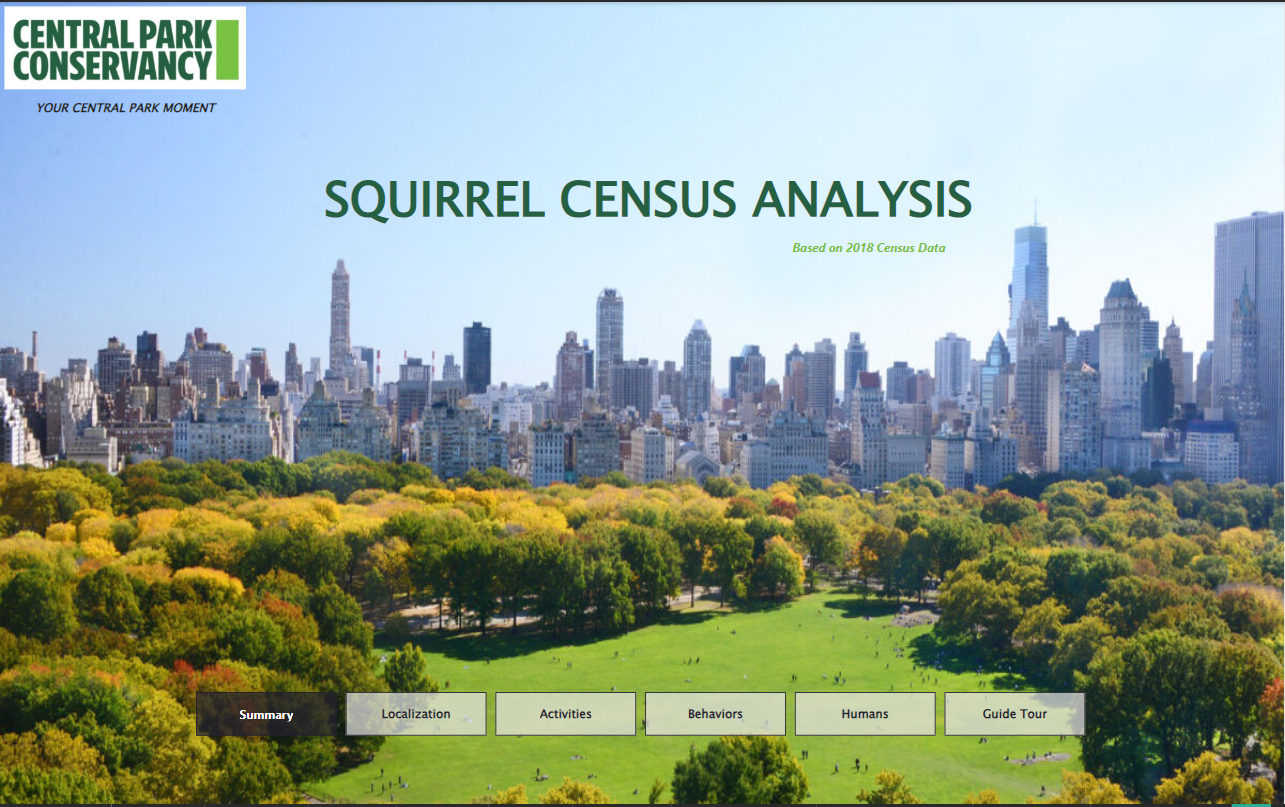

## **Localization**

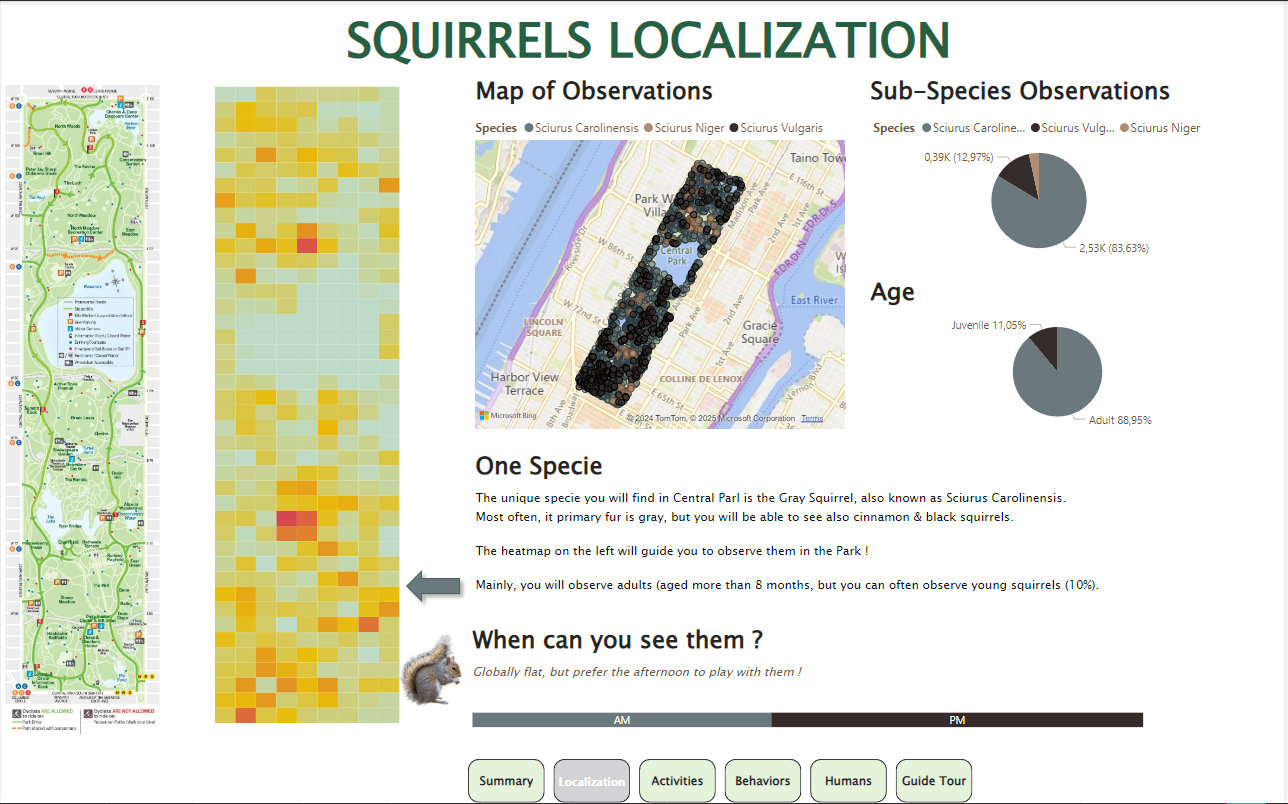

*Observations lors du passage sur la heatmap*

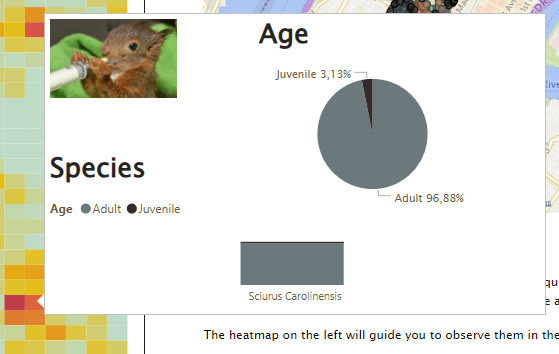

## **Activities**

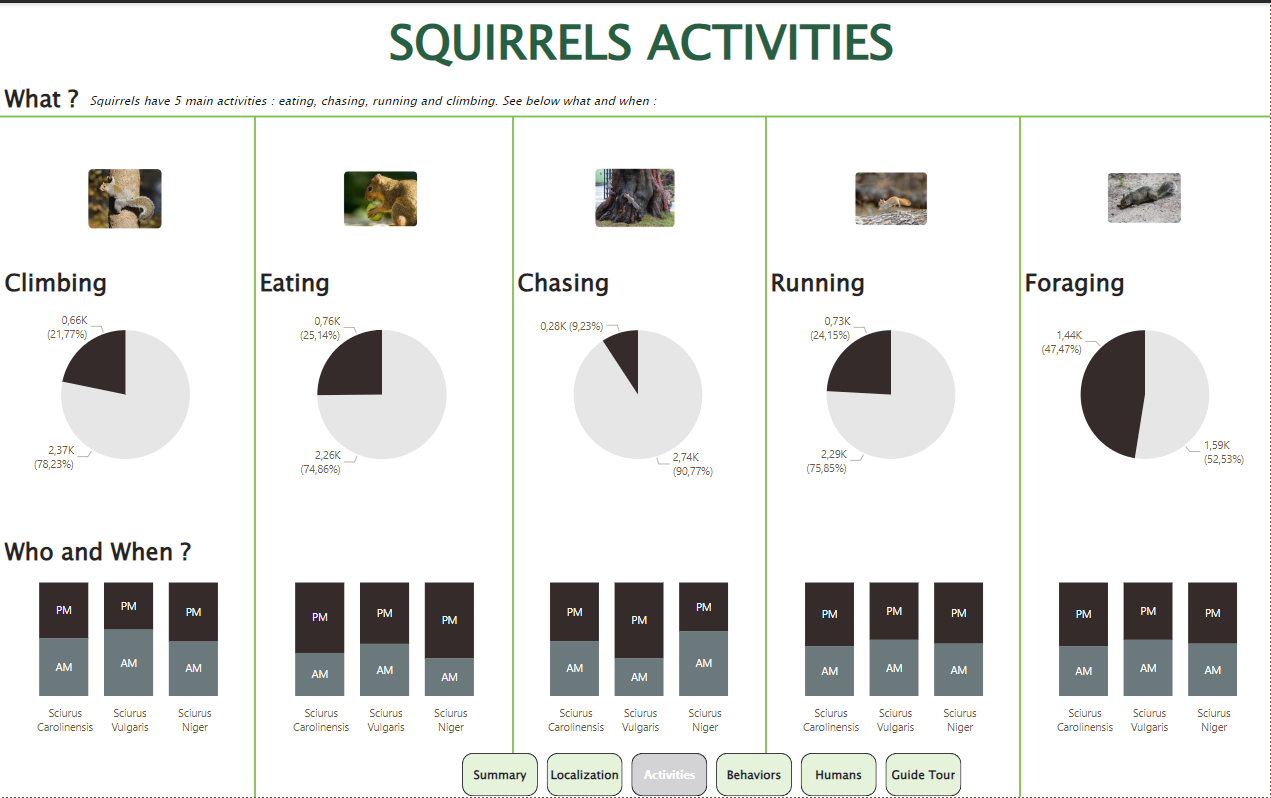

*Observations lors du passage sur les activités*

image.png

## **Behaviors**

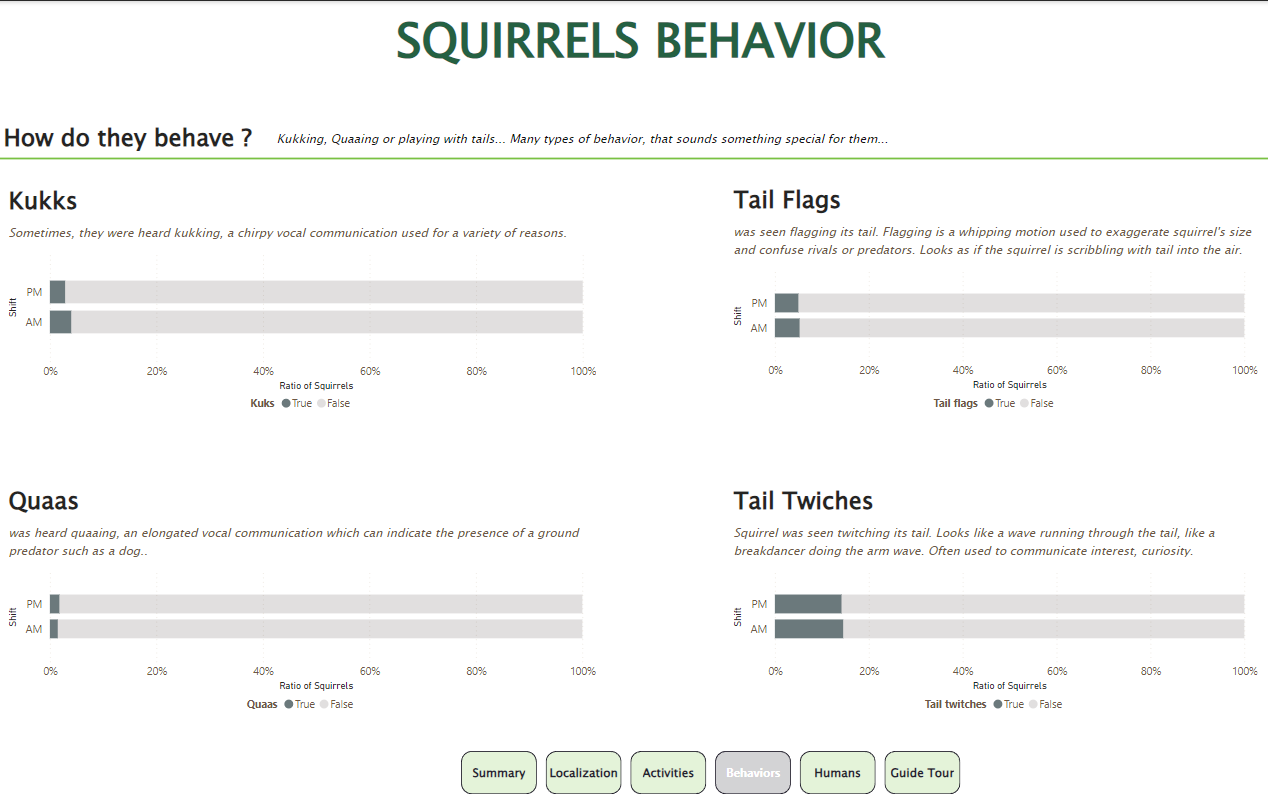

*Observations lors du passage sur les comportements*

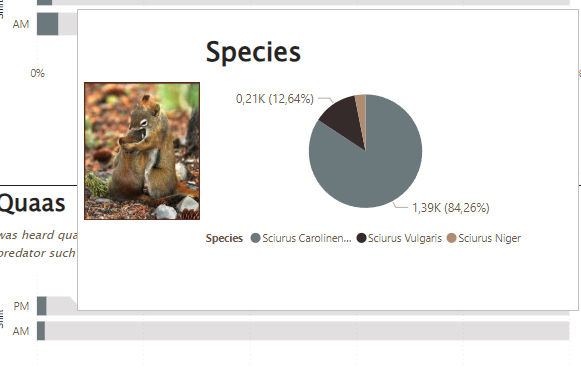

## **Humans**

image.png

*Ajout de signets pour faire découvrir des anecdotes*

image.png

## **Guide Tour**

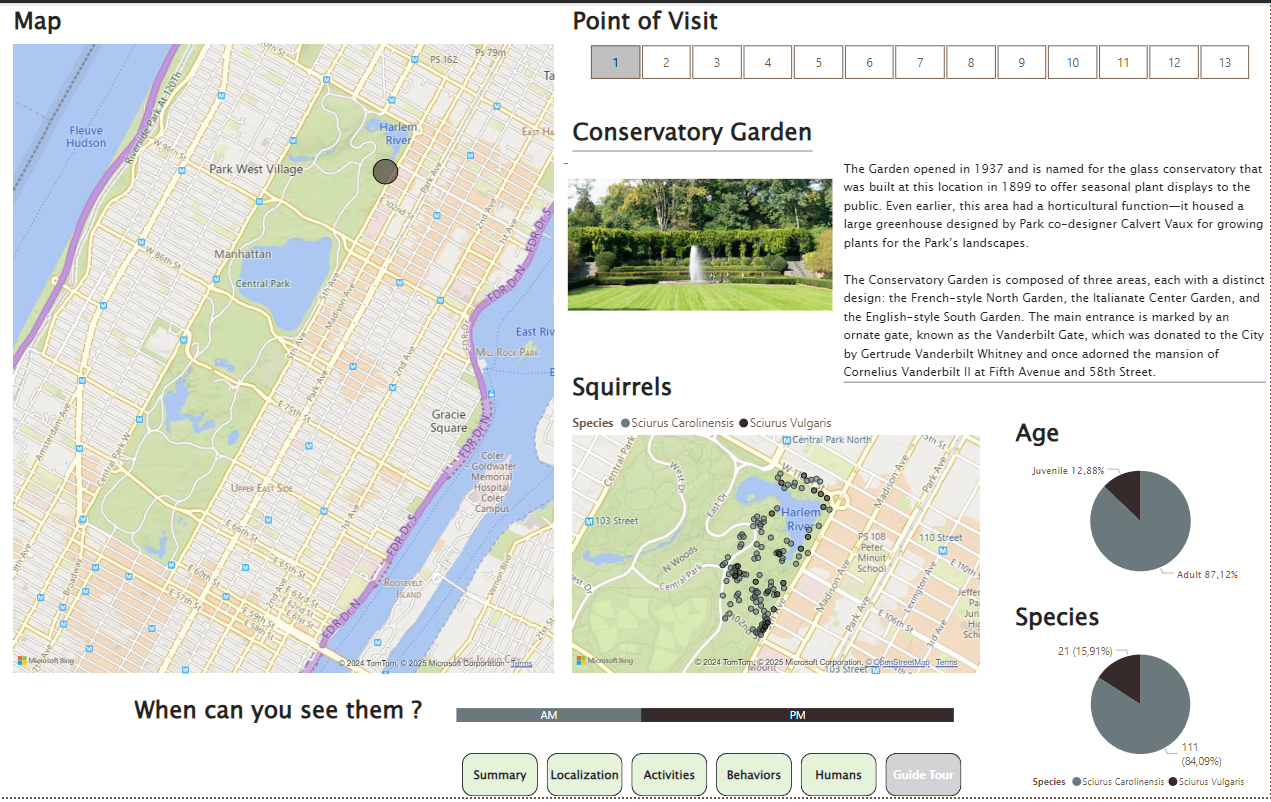

*Possibilité de naviguer entre les points de visite, avec les éléments de visite et informations clés associées*

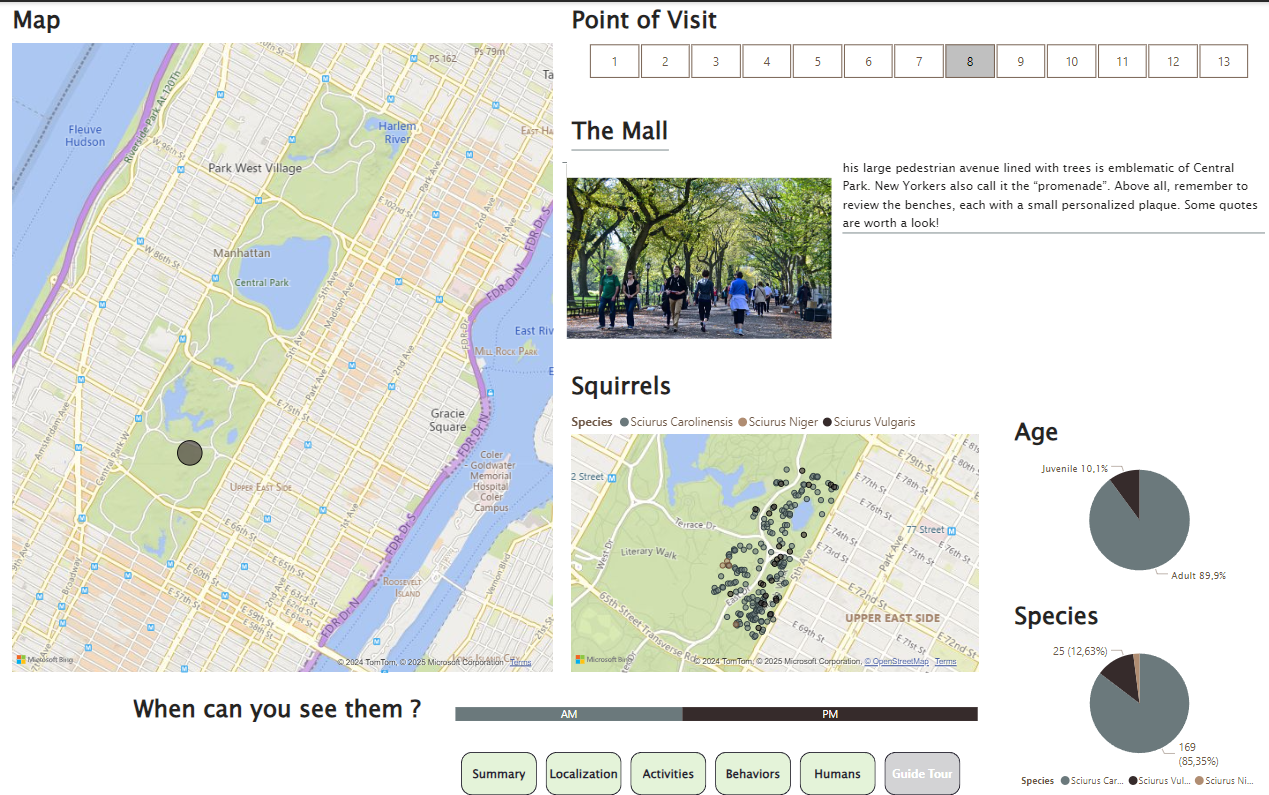

*Observations des activités par point*

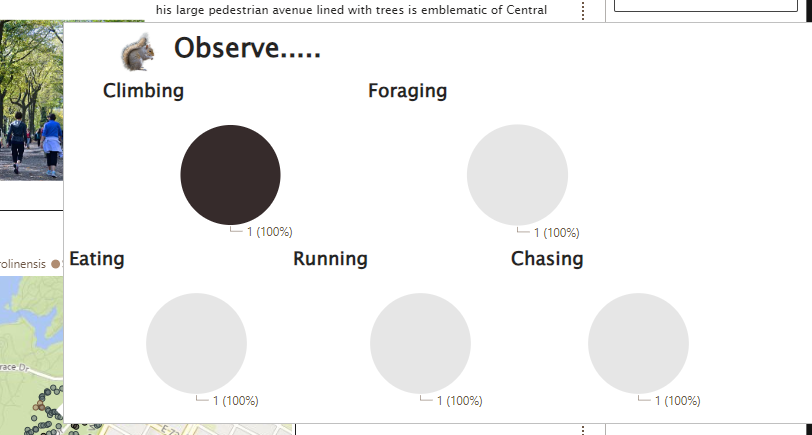